In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv('Coffee_Stores_Data.csv')

In [63]:
df.head()

,StoreID,BusinessDate,PLU,Description,ItemType,CategoryLvl1Desc,CategoryLvl2Desc,CategoryLvl3Desc,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,GroupID,MissedSales
0,2,2019-06-29,3000227,Caprese Sandwich,Unassigned,Food,Cold Case,Ready to Eat,0.0,3.0,0.0,21,0,2.0,0.000000
1,2,2019-06-29,830620,Honey Raisin Bran Muffin,Core,Food,Bake Case,Muffins & Scones,4.0,2.0,0.0,10,0,2.0,0.000000
2,2,2019-06-29,6228,Pressed Juicery Spicy Greens w Ginger,Unassigned,Food,Cold Case,Ready to Drink,0.0,1.0,9.0,13,0,2.0,0.000000
3,2,2019-06-29,12216,Vive Juice Shot,Unassigned,Food,Cold Case,Ready to Drink,0.0,0.0,27.0,0,0,2.0,0.000000
4,2,2019-06-29,3000277,Mixed Berries & Granola Yogurt Parfait,Unassigned,Food,Cold Case,Ready to Eat,0.0,3.0,0.0,11,1,2.0,0.578969


In [64]:
df.columns

Index(['StoreID', 'BusinessDate', 'PLU', 'Description', 'ItemType',
       'CategoryLvl1Desc', 'CategoryLvl2Desc', 'CategoryLvl3Desc',
       'ReceivedQuantity', 'SoldQuantity', 'EndQuantity', 'LatestOrder',
       'StockedOut', 'GroupID', 'MissedSales'],
      dtype='object')

In [65]:
df_18 = df[df['StoreID'] == 18].copy()
# df_18['DayOfMonth'] = df_18['BusinessDate'].apply(lambda x:(pd.Timestamp(x)).day)
# df_18['DayOfWeek'] = df_18['BusinessDate'].apply(lambda x:(pd.Timestamp(x)).day_of_week)
# df_18['Month'] = df_18['BusinessDate'].apply(lambda x:(pd.Timestamp(x)).month)
# df_18['Year'] = df_18['BusinessDate'].apply(lambda x:(pd.Timestamp(x)).year)
df_18.drop(['StoreID','Description','LatestOrder','CategoryLvl1Desc'],axis=1,inplace=True)

In [66]:
df_18.head()

,BusinessDate,PLU,ItemType,CategoryLvl2Desc,CategoryLvl3Desc,ReceivedQuantity,SoldQuantity,EndQuantity,StockedOut,GroupID,MissedSales
39461,2019-06-29,3000227,Unassigned,Cold Case,Ready to Eat,4.0,1.0,4.0,0,3.0,0.00000
39462,2019-06-29,830620,Core,Bake Case,Muffins & Scones,2.0,1.0,0.0,1,3.0,2.56395
39463,2019-06-29,6228,Unassigned,Cold Case,Ready to Drink,6.0,0.0,8.0,0,3.0,0.00000
39464,2019-06-29,12216,Unassigned,Cold Case,Ready to Drink,0.0,0.0,3.0,0,3.0,0.00000
39465,2019-06-29,3000277,Unassigned,Cold Case,Ready to Eat,4.0,3.0,4.0,0,3.0,0.00000


In [67]:
df_18 = pd.get_dummies(df_18,columns = ['ItemType','CategoryLvl2Desc','CategoryLvl3Desc'])

In [68]:
df_18.head()

,BusinessDate,PLU,ReceivedQuantity,SoldQuantity,EndQuantity,StockedOut,GroupID,MissedSales,ItemType_Core,ItemType_Seasonal,ItemType_Unassigned,CategoryLvl2Desc_Bake Case,CategoryLvl2Desc_Cold Case,CategoryLvl3Desc_Bagels,CategoryLvl3Desc_Cakes & Breads,CategoryLvl3Desc_Cookies & Bars,CategoryLvl3Desc_Muffins & Scones,CategoryLvl3Desc_Pastries,CategoryLvl3Desc_Ready to Drink,CategoryLvl3Desc_Ready to Eat
39461,2019-06-29,3000227,4.0,1.0,4.0,0,3.0,0.00000,0,0,1,0,1,0,0,0,0,0,0,1
39462,2019-06-29,830620,2.0,1.0,0.0,1,3.0,2.56395,1,0,0,1,0,0,0,0,1,0,0,0
39463,2019-06-29,6228,6.0,0.0,8.0,0,3.0,0.00000,0,0,1,0,1,0,0,0,0,0,1,0
39464,2019-06-29,12216,0.0,0.0,3.0,0,3.0,0.00000,0,0,1,0,1,0,0,0,0,0,1,0
39465,2019-06-29,3000277,4.0,3.0,4.0,0,3.0,0.00000,0,0,1,0,1,0,0,0,0,0,0,1


In [69]:
df_18['BusinessDate'] = df_18['BusinessDate'].apply(lambda x:x + " 06:00:00")

In [70]:
df_18.columns

Index(['BusinessDate', 'PLU', 'ReceivedQuantity', 'SoldQuantity',
       'EndQuantity', 'StockedOut', 'GroupID', 'MissedSales', 'ItemType_Core',
       'ItemType_Seasonal', 'ItemType_Unassigned',
       'CategoryLvl2Desc_Bake Case', 'CategoryLvl2Desc_Cold Case',
       'CategoryLvl3Desc_Bagels', 'CategoryLvl3Desc_Cakes & Breads',
       'CategoryLvl3Desc_Cookies & Bars', 'CategoryLvl3Desc_Muffins & Scones',
       'CategoryLvl3Desc_Pastries', 'CategoryLvl3Desc_Ready to Drink',
       'CategoryLvl3Desc_Ready to Eat'],
      dtype='object')

In [71]:
df_18.index = pd.to_datetime(df_18['BusinessDate'], format='%Y-%m-%d %H:%M:%S')

In [72]:
df_18.head()

,BusinessDate,PLU,ReceivedQuantity,SoldQuantity,EndQuantity,StockedOut,GroupID,MissedSales,ItemType_Core,ItemType_Seasonal,ItemType_Unassigned,CategoryLvl2Desc_Bake Case,CategoryLvl2Desc_Cold Case,CategoryLvl3Desc_Bagels,CategoryLvl3Desc_Cakes & Breads,CategoryLvl3Desc_Cookies & Bars,CategoryLvl3Desc_Muffins & Scones,CategoryLvl3Desc_Pastries,CategoryLvl3Desc_Ready to Drink,CategoryLvl3Desc_Ready to Eat
BusinessDate,,,,,,,,,,,,,,,,,,,,
2019-06-29 06:00:00,2019-06-29 06:00:00,3000227,4.0,1.0,4.0,0,3.0,0.00000,0,0,1,0,1,0,0,0,0,0,0,1
2019-06-29 06:00:00,2019-06-29 06:00:00,830620,2.0,1.0,0.0,1,3.0,2.56395,1,0,0,1,0,0,0,0,1,0,0,0
2019-06-29 06:00:00,2019-06-29 06:00:00,6228,6.0,0.0,8.0,0,3.0,0.00000,0,0,1,0,1,0,0,0,0,0,1,0
2019-06-29 06:00:00,2019-06-29 06:00:00,12216,0.0,0.0,3.0,0,3.0,0.00000,0,0,1,0,1,0,0,0,0,0,1,0
2019-06-29 06:00:00,2019-06-29 06:00:00,3000277,4.0,3.0,4.0,0,3.0,0.00000,0,0,1,0,1,0,0,0,0,0,0,1


<AxesSubplot:xlabel='BusinessDate'>

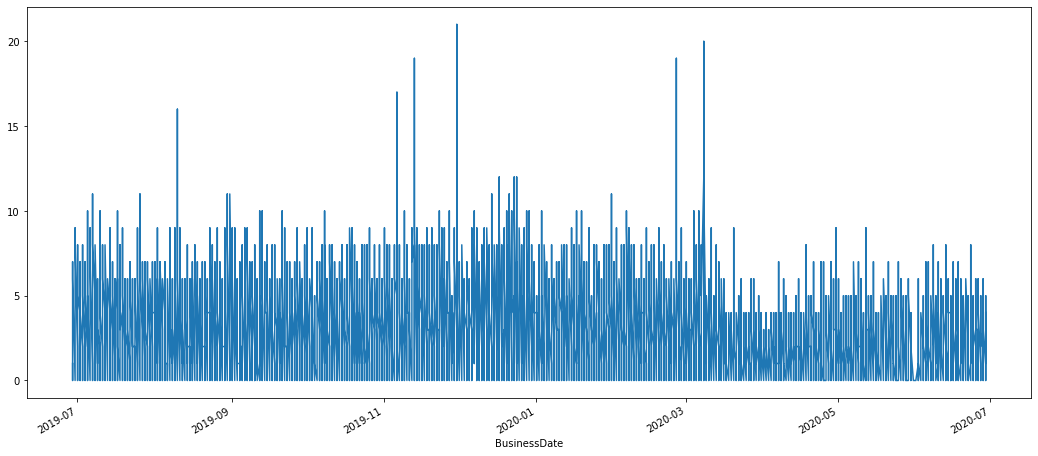

In [73]:
fig, ax = plt.subplots(figsize=(18,8))
temp = df_18['SoldQuantity']
temp.plot()

In [28]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [74]:
WINDOW_SIZE = 14
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((10295, 14, 1), (10295,))

In [75]:
X1

array([[[1.],
        [1.],
        [0.],
        ...,
        [3.],
        [2.],
        [1.]],

       [[1.],
        [0.],
        [0.],
        ...,
        [2.],
        [1.],
        [0.]],

       [[0.],
        [0.],
        [3.],
        ...,
        [1.],
        [0.],
        [3.]],

       ...,

       [[3.],
        [0.],
        [2.],
        ...,
        [0.],
        [5.],
        [1.]],

       [[0.],
        [2.],
        [0.],
        ...,
        [5.],
        [1.],
        [2.]],

       [[2.],
        [0.],
        [2.],
        ...,
        [1.],
        [2.],
        [3.]]])

In [76]:
X_train1, y_train1 = X1[:7500], y1[:7500]
X_val1, y_val1 = X1[7500:8700], y1[7500:8700]
X_test1, y_test1 = X1[8700:], y1[8700:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((7500, 14, 1), (7500,), (1200, 14, 1), (1200,), (1595, 14, 1), (1595,))

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((14, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [81]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.01), metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, callbacks=[cp1])

Epoch 1/100
233/235 [============================>.] - ETA: 0s - loss: 4.9566 - root_mean_squared_error: 2.2263

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


235/235 [==============================] - 21s 77ms/step - loss: 4.9499 - root_mean_squared_error: 2.2248 - val_loss: 3.4699 - val_root_mean_squared_error: 1.8628
Epoch 2/100
232/235 [============================>.] - ETA: 0s - loss: 4.2488 - root_mean_squared_error: 2.0613

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


235/235 [==============================] - 19s 82ms/step - loss: 4.2438 - root_mean_squared_error: 2.0601 - val_loss: 3.3699 - val_root_mean_squared_error: 1.8357
Epoch 3/100
234/235 [============================>.] - ETA: 0s - loss: 4.0519 - root_mean_squared_error: 2.0129

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


235/235 [==============================] - 17s 73ms/step - loss: 4.0484 - root_mean_squared_error: 2.0121 - val_loss: 2.6629 - val_root_mean_squared_error: 1.6318
Epoch 4/100
235/235 [==============================] - 3s 12ms/step - loss: 3.9739 - root_mean_squared_error: 1.9935 - val_loss: 3.8621 - val_root_mean_squared_error: 1.9652
Epoch 5/100
235/235 [==============================] - 3s 12ms/step - loss: 3.9362 - root_mean_squared_error: 1.9840 - val_loss: 3.1351 - val_root_mean_squared_error: 1.7706
Epoch 6/100
235/235 [==============================] - 3s 11ms/step - loss: 3.8203 - root_mean_squared_error: 1.9546 - val_loss: 4.1437 - val_root_mean_squared_error: 2.0356
Epoch 7/100
235/235 [==============================] - 3s 12ms/step - loss: 3.7729 - root_mean_squared_error: 1.9424 - val_loss: 3.0166 - val_root_mean_squared_error: 1.7368
Epoch 8/100
235/235 [==============================] - 3s 12ms/step - loss: 3.6692 - root_mean_squared_error: 1.9155 - val_loss: 3.2152 - val

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


235/235 [==============================] - 18s 75ms/step - loss: 3.5554 - root_mean_squared_error: 1.8856 - val_loss: 2.3611 - val_root_mean_squared_error: 1.5366
Epoch 11/100
235/235 [==============================] - 3s 11ms/step - loss: 3.5055 - root_mean_squared_error: 1.8723 - val_loss: 2.8986 - val_root_mean_squared_error: 1.7025
Epoch 12/100
235/235 [==============================] - 3s 12ms/step - loss: 3.4336 - root_mean_squared_error: 1.8530 - val_loss: 3.1026 - val_root_mean_squared_error: 1.7614
Epoch 13/100
235/235 [==============================] - 3s 11ms/step - loss: 3.3851 - root_mean_squared_error: 1.8399 - val_loss: 2.9254 - val_root_mean_squared_error: 1.7104
Epoch 14/100
235/235 [==============================] - 3s 11ms/step - loss: 3.4150 - root_mean_squared_error: 1.8480 - val_loss: 3.1587 - val_root_mean_squared_error: 1.7773
Epoch 15/100
235/235 [==============================] - 3s 11ms/step - loss: 3.3582 - root_mean_squared_error: 1.8325 - val_loss: 2.6812 

Epoch 57/100
235/235 [==============================] - 3s 13ms/step - loss: 2.0561 - root_mean_squared_error: 1.4339 - val_loss: 3.0476 - val_root_mean_squared_error: 1.7457
Epoch 58/100
235/235 [==============================] - 3s 11ms/step - loss: 2.1409 - root_mean_squared_error: 1.4632 - val_loss: 3.4996 - val_root_mean_squared_error: 1.8707
Epoch 59/100
235/235 [==============================] - 3s 11ms/step - loss: 2.0437 - root_mean_squared_error: 1.4296 - val_loss: 3.4850 - val_root_mean_squared_error: 1.8668
Epoch 60/100
235/235 [==============================] - 3s 12ms/step - loss: 2.0433 - root_mean_squared_error: 1.4294 - val_loss: 3.2470 - val_root_mean_squared_error: 1.8019
Epoch 61/100
235/235 [==============================] - 3s 12ms/step - loss: 2.0625 - root_mean_squared_error: 1.4361 - val_loss: 3.5461 - val_root_mean_squared_error: 1.8831
Epoch 62/100
235/235 [==============================] - 3s 11ms/step - loss: 1.9415 - root_mean_squared_error: 1.3934 - val_l

In [44]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [53]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

,Train Predictions,Actuals
0,2.409668,2.0
1,2.779252,6.0
2,3.476852,4.0
3,4.189299,7.0
4,3.548730,6.0
...,...,...
7495,1.457331,2.0
7496,2.086378,1.0
7497,2.221167,1.0
7498,2.179868,0.0


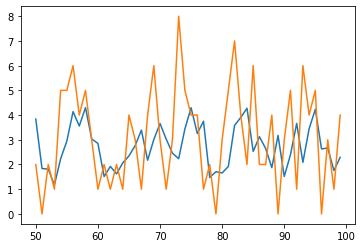

In [54]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [55]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

,Val Predictions,Actuals
0,2.612844,1.0
1,2.705351,4.0
2,2.752990,2.0
3,3.160733,0.0
4,1.435529,1.0
...,...,...
1195,2.769100,3.0
1196,2.816897,2.0
1197,2.963723,3.0
1198,2.446071,4.0


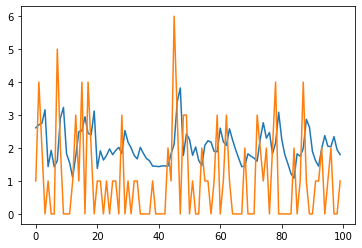

In [56]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [57]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

,Test Predictions,Actuals
0,2.579758,2.0
1,2.423310,0.0
2,1.849002,3.0
3,1.965158,3.0
4,3.069124,0.0
...,...,...
1599,1.384157,5.0
1600,3.061442,1.0
1601,2.928434,2.0
1602,2.035754,3.0


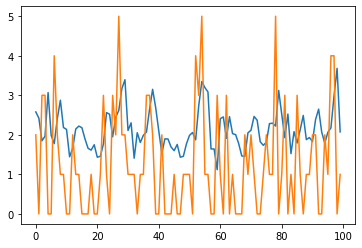

In [58]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

In [59]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

(      Predictions  Actuals
 0        2.579758      2.0
 1        2.423310      0.0
 2        1.849002      3.0
 3        1.965158      3.0
 4        3.069124      0.0
 ...           ...      ...
 1599     1.384157      5.0
 1600     3.061442      1.0
 1601     2.928434      2.0
 1602     2.035754      3.0
 1603     2.877273      4.0
 
 [1604 rows x 2 columns],
 2.8846659445701603)

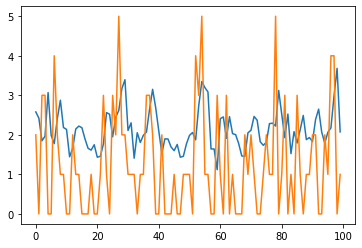

In [60]:
plot_predictions1(model1, X_test1, y_test1)

In [37]:
df_18[df_18['MissedSales'].isna()] = 0.0

In [38]:
df_18_X = df_18.drop(['SoldQuantity'],axis=1)
df_18_y = df_18['SoldQuantity']

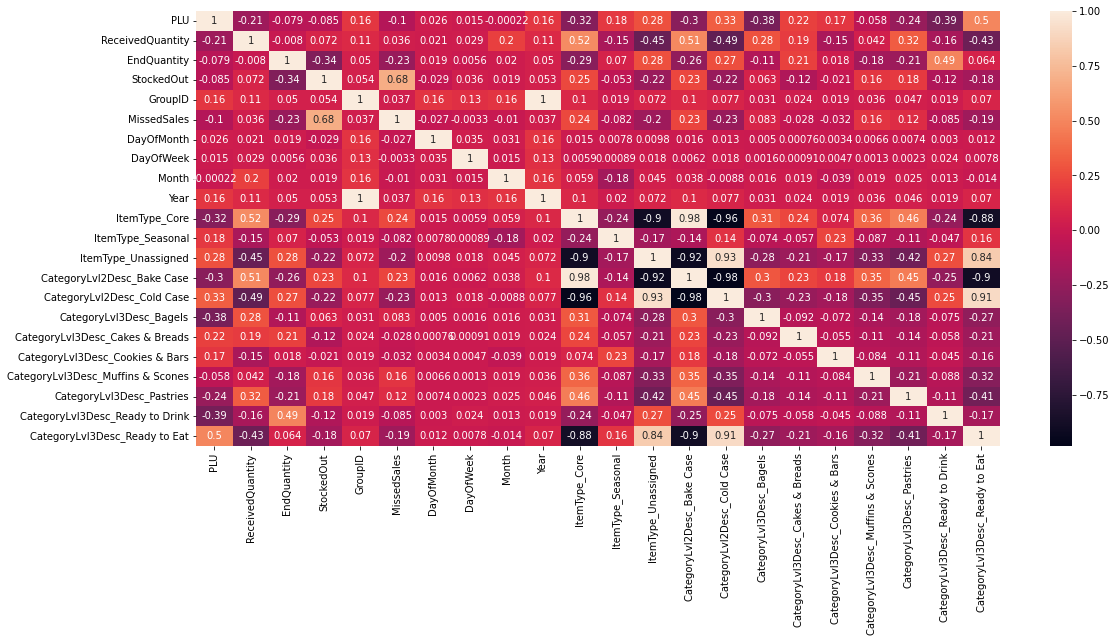

In [39]:
fig, ax = plt.subplots(figsize=(18,8))

corrMatrix = df_18_X.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [40]:
df_18_X = df_18_X.drop(['GroupID','CategoryLvl2Desc_Bake Case','CategoryLvl2Desc_Cold Case','ItemType_Unassigned','CategoryLvl3Desc_Bagels'],axis=1)

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_18_X, df_18_y, test_size=0.2, random_state=1)

In [42]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X_train,y_train)
regression.score(X_test,y_test)

0.6073332124956297

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor,XGBRFRegressor

model_params = {
    
    'linear_regression': {
        'model': LinearRegression(),
        'params': {
            #######
        }  
    },
    'ridge_regression': {
        'model': Ridge(),
        'params': {
             'alpha': [0.01,0.1,0.5,1.0]
         }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
             'max_depth':[2,5,10,15,20]
         }  
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params': {
             'max_depth':[2,5,10,15,20,25]
         }
    },
        'gbm_regression' : {
        'model': GradientBoostingRegressor(),
        'params' : {
            'learning_rate': [0.1],
            'n_estimators': [500],
            'max_depth' : [1,2,5,7,10]
         }
    },
        'lgb' : {
        'model': LGBMRegressor(),
        'params' : {
            'learning_rate':[0.001,0.005,0.01,0.05,0.1,0.2,0.5],
            'n_estimators':[10,50,100,500,1000,1500]
         }
    },
        'XGB_regression' : {
        'model': XGBRegressor(),
        'params' : {
            'learning_rate': [0.1],
            'n_estimators': [1500,2000,2500,4000,5000],
            'max_depth' : [1,2,5,7,10]
         }
    },
        'XGBRF_regression' : {
        'model': XGBRFRegressor(),
        'params' : {
            'learning_rate':[0.001,0.005,0.01,0.05,0.1,0.2,0.5],
            'n_estimators':[10,50,100,500,1000,1500]
         }
    }
}

In [56]:
# Model Selection and hyper-parameter tuning 
from sklearn.model_selection import GridSearchCV

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'],mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_temp = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_temp

KeyboardInterrupt: 

In [54]:
df_temp

,model,best_score,best_params
0,XGB_regression,0.72773,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti..."


In [57]:
import tensorflow as tf

In [58]:
df_18.head()

,PLU,ReceivedQuantity,SoldQuantity,EndQuantity,StockedOut,GroupID,MissedSales,DayOfMonth,DayOfWeek,Month,...,ItemType_Unassigned,CategoryLvl2Desc_Bake Case,CategoryLvl2Desc_Cold Case,CategoryLvl3Desc_Bagels,CategoryLvl3Desc_Cakes & Breads,CategoryLvl3Desc_Cookies & Bars,CategoryLvl3Desc_Muffins & Scones,CategoryLvl3Desc_Pastries,CategoryLvl3Desc_Ready to Drink,CategoryLvl3Desc_Ready to Eat
39461,3000227.0,4.0,1.0,4.0,0.0,3.0,0.00000,29.0,5.0,6.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
39462,830620.0,2.0,1.0,0.0,1.0,3.0,2.56395,29.0,5.0,6.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
39463,6228.0,6.0,0.0,8.0,0.0,3.0,0.00000,29.0,5.0,6.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39464,12216.0,0.0,0.0,3.0,0.0,3.0,0.00000,29.0,5.0,6.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39465,3000277.0,4.0,3.0,4.0,0.0,3.0,0.00000,29.0,5.0,6.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
